In [23]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import PIL

In [5]:
test_data_dir = '/kaggle/input/bttai-nybg-2024/BTTAIxNYBG-train.csv'
train_data_dir = '/kaggle/input/bttai-nybg-2024/BTTAIxNYBG-train.csv'
validation_data_dir = '/kaggle/input/bttai-nybg-2024/BTTAIxNYBG-train.csv'

In [17]:
test_img_dir = '/kaggle/input/bttai-nybg-2024/BTTAIxNYBG-test/BTTAIxNYBG-test'
train_img_dir = '/kaggle/input/bttai-nybg-2024/BTTAIxNYBG-train/BTTAIxNYBG-train'
validation_img_dir = '/kaggle/input/bttai-nybg-2024/BTTAIxNYBG-validation/BTTAIxNYBG-validation'

In [6]:
df = pd.read_csv(train_data_dir)
df.head()

,uniqueID,classLabel,classID,source,imageFile
0,2,occluded-specimens,8,L,a1a8b48e8cb142b3.jpg
1,3,microscope-slides,6,L,79599db2ac9092b6.jpg
2,4,illustrations-color,2,BHL,c449696f2f0d0d92.jpg
3,5,illustrations-color,2,P,80a8f4a393b4e08c.jpg
4,6,animal-specimens,0,AK,041a1c6e73313638.jpg


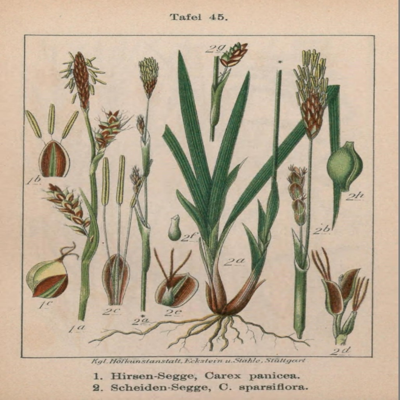

In [37]:
#,test to open for image path
image_path = os.path.join(train_img_dir, df.iloc[2]['imageFile'])
PIL.Image.open(image_path).resize((400, 400))

## classLabel_counts = df['classLabel'].value_counts()

print("Count of each unique class in the 'classLabel' column:")
print(classLabel_counts)

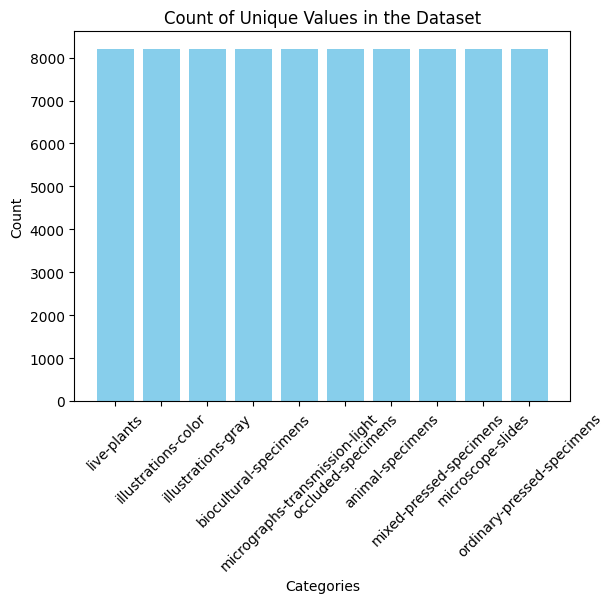

In [4]:

# Plot the counts using Matplotlib
plt.bar(classLabel_counts.index, classLabel_counts.values, color='skyblue')

plt.xticks(rotation=45)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count of Unique Values in the Dataset')
plt.show()